# Data visualisation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from constants import DATA_PATH_NOTEBOOK 

## Load dataset

In [15]:
data = load_pickle(DATA_PATH_NOTEBOOK)

## Structure of the dataset

In [16]:
participant = 's6'
session = 'sess1'

In [ ]:
# Structure of the data 

print(f'There is 4 participants : {data.keys()}\n')
print(f'Each participant have a different number of sessions')
for keys in data.keys():
    print(f'- Participant {keys} have {len(data[keys].keys())} sessions : {data[keys].keys()}')
print('\n')

print(f'For each session, the following data are available :')
for keys in data[participant][session].keys():
    print(f'- {keys}: {type(data[participant][session][keys])}')

There is 4 participants : dict_keys(['s6', 's7', 's11', 's12'])

Each participant have a different number of sessions
- Participant s6 have 1 sessions : dict_keys(['sess1'])
- Participant s7 have 1 sessions : dict_keys(['sess1'])
- Participant s11 have 3 sessions : dict_keys(['sess1', 'sess2', 'sess3'])
- Participant s12 have 2 sessions : dict_keys(['sess1', 'sess2'])


For each session, the following data are available :
- neural_data: <class 'numpy.ndarray'>
- fs: <class 'numpy.uint16'>
- trials_info: <class 'dict'>
- channel_labels: <class 'list'>
- channel_locations: <class 'tuple'>


In [49]:
print(f'The sampling frequency is {data[participant][session]['fs']}')

The sampling frequency is 2048


In [80]:
Nb_channels = len(data[participant][session]['channel_labels'])
print(f'\nThere is {Nb_channels} channels in the data')
Nb_timepoints = data[participant][session]['neural_data'].shape[1]
print(f'There is {Nb_timepoints} timepoints in the data')


There is 106 channels in the data
There is 7718528 timepoints in the data


## Trials information

In [ ]:
Nb_trials_info = len(data[participant][session]['trials_info'])
print(f'\nThere is {Nb_trials_info} information about trials in the data :')

trials_information_keys = data[participant][session]['trials_info'].keys()
for keys in trials_information_keys:
    print(f'- {keys}')


There is 70 information about trials in the data
- ParticipantID
- SessionType
- SessionID
- Handness
- HandUsed
- ElectrodeHemis
- TrialID
- BlockTimeCode
- ObjectID
- ActionType
- CueType
- ObjectSize
- ObjectColor
- ObjectPosition
- CueColor
- inBaseDuration
- inCueDuration
- inWaitToGoDuration
- inTimeOut
- TS_BlockCode
- TS_TrialStart
- TS_CueOn
- TS_CueOff
- TS_GoSignal
- TS_HandOut
- TS_ObjectGrasp
- TS_ObjectReplace
- TS_HandBack
- ErrorCode
- ErrorType
- ObjectGrasped
- ObjectTargeted
- CorrectGrasped
- CatchMistakeDetected
- Dur_Baseline
- Dur_Cue
- Dur_WaitToGo
- Dur_ReacTime
- Dur_Reaching
- Dur_Grasped
- Dur_GoBack
- Outfile
- Note
- BlockTimeStamp
- TimeRef_Mat
- TimeRef_Pulse
- SyncError_ms
- TrialFound
- BlockID
- p_BlockTimeCode
- p_TS_BlockCode
- p_TS_TrialStart
- p_TS_CueOn
- p_TS_GoSignal
- p_TS_HandOut
- p_TS_ObjectGrasp
- p_TS_ObjectReplace
- p_TS_HandBack
- SyncError_Trend
- SyncError_Trend_ttest
- SequenceError_ms
- SequenceErrorSum_ms
- SequenceMatch
- align_d

In [113]:
participant_related_keys = ['ParticipantID', 'SessionType', 'SessionID', 'Handness', 'HandUsed', 'ElectrodeHemis']

print(f'\nThere is {len(participant_related_keys)} information about the participant :')
for keys in participant_related_keys:
    infos = data[participant][session]['trials_info'][keys]
    print(f'- {keys} : {np.unique(data[participant][session]['trials_info'][keys])[:]} - (list of {len(data[participant][session]['trials_info'][keys])} objects)')


There is 6 information about the participant :
- ParticipantID : ['s06'] - (list of 296 objects)
- SessionType : ['exe-obs'] - (list of 296 objects)
- SessionID : [1] - (list of 296 objects)
- Handness : ['right'] - (list of 296 objects)
- HandUsed : ['left'] - (list of 296 objects)
- ElectrodeHemis : ['right'] - (list of 296 objects)


In [ ]:
trials_related_keys = ['TrialID', 'BlockTimeCode', 'TS_TrialStart', 'p_TS_TrialStart', 'SyncError_Trend', 'align_diff_trend']
trial_id = np.array(data[participant][session]['trials_info']['TrialID'])
Nb_trials = len(trial_id)
Nb_unique_trials = len(np.unique(trial_id))
print(f'There is {Nb_trials} trials in the data, with {Nb_unique_trials} unique trials')
print(trial_id)

There is 296 trials in the data, with 76 unique trials
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76]


For participant s6 sess1 :
```
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76]
```

In [141]:
print(f'BlockTimeCode is a list of {len(data[participant][session]['trials_info']['BlockTimeCode'])} objects : {np.array(data[participant][session]['trials_info']['BlockTimeCode']).shape}')
print(f'Unique values of BlockTimeCode : {np.unique(np.array(data[participant][session]['trials_info']['BlockTimeCode']), axis = 0)}')

BlockTimeCode is a list of 296 objects : (296, 3)
Unique values of BlockTimeCode : [[40 24 81]
 [44 82 57]
 [47 14 90]
 [56 31 54]]


In [216]:
trials_design_keys = ['ObjectID', 'ActionType', 'CueType', 'ObjectSize', 'ObjectPosition', 'CueColor']
for keys in trials_design_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')
    

ObjectID is a list of 296 objects
Unique values of ObjectID : ['ECBG1' 'ECBG3' 'ECBR1' 'ECBR3' 'ECSG1' 'ECSG3' 'ECSR1' 'ECSR3' 'EMBG1'
 'EMBG3' 'EMBR1' 'EMBR3' 'EMSG1' 'EMSG3' 'EMSR1' 'EMSR3' 'OCBG1' 'OCBG3'
 'OCBR1' 'OCBR3' 'OCSG1' 'OCSG3' 'OCSR1' 'OCSR3' 'OMBG1' 'OMBG3' 'OMBR1'
 'OMBR3' 'OMSG1' 'OMSG3' 'OMSR1' 'OMSR3'] (32 unique values)
************************************
ActionType is a list of 296 objects
Unique values of ActionType : ['E' 'O'] (2 unique values)
************************************
CueType is a list of 296 objects
Unique values of CueType : ['C' 'M'] (2 unique values)
************************************
ObjectSize is a list of 296 objects
Unique values of ObjectSize : ['B' 'S'] (2 unique values)
************************************
ObjectPosition is a list of 296 objects
Unique values of ObjectPosition : ['1' '3'] (2 unique values)
************************************
CueColor is a list of 296 objects
Unique values of CueColor : [ 1  2  4  8 16 32] (6 unique val

In [215]:
trials_time_invariant_keys = ['inBaseDuration', 'inCueDuration', 'inWaitToGoDuration', 'inTimeOut']
for keys in trials_time_invariant_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

inBaseDuration is a list of 296 objects
Unique values of inBaseDuration : [1000] (1 unique values)
************************************
inCueDuration is a list of 296 objects
Unique values of inCueDuration : [500] (1 unique values)
************************************
inWaitToGoDuration is a list of 296 objects
Unique values of inWaitToGoDuration : [1500] (1 unique values)
************************************
inTimeOut is a list of 296 objects
Unique values of inTimeOut : [15000] (1 unique values)
************************************


BlockTimeCode is a list of 296 objects


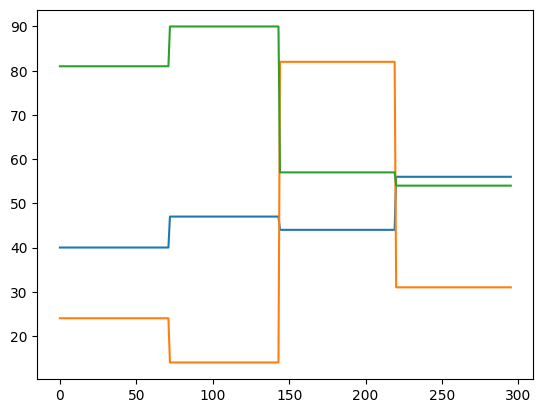

TS_BlockCode is a list of 296 objects


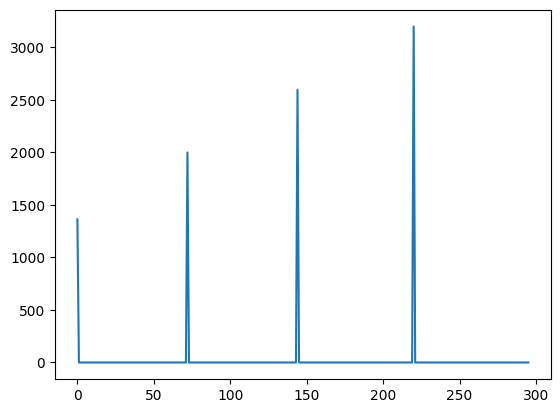

TS_TrialStart is a list of 296 objects


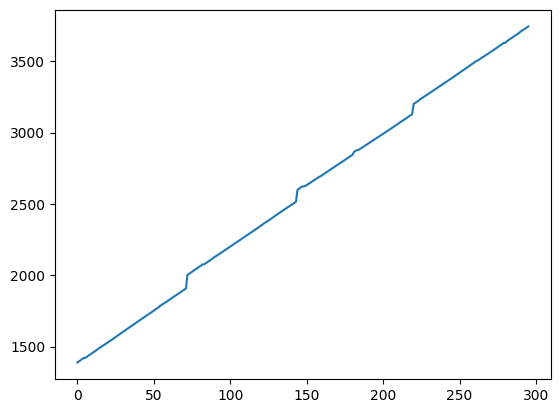

TS_CueOn is a list of 296 objects


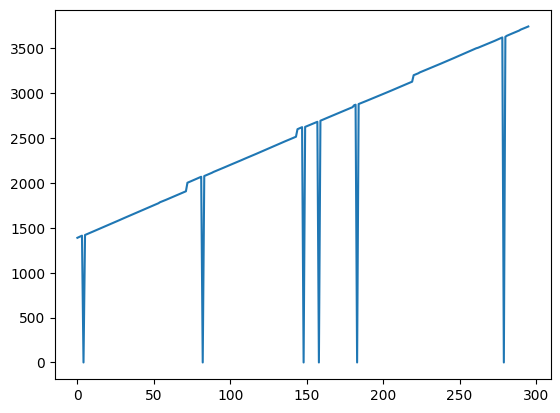

TS_CueOff is a list of 296 objects


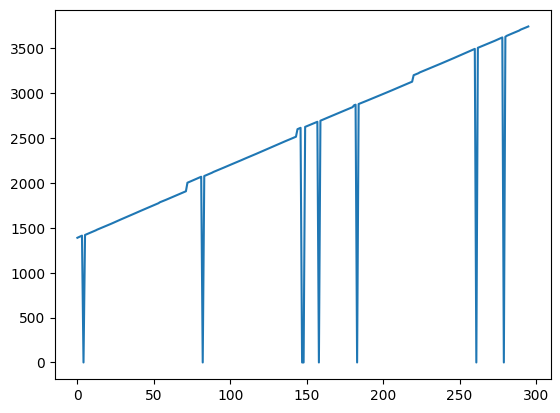

TS_GoSignal is a list of 296 objects


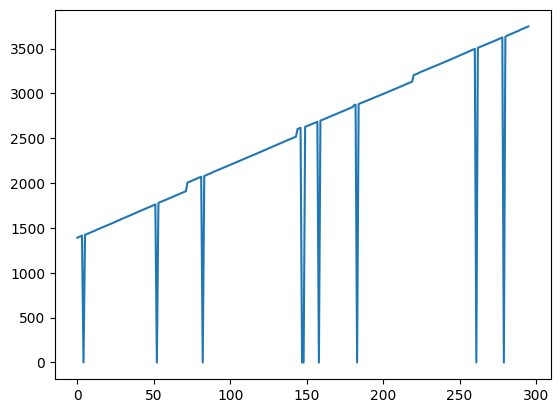

TS_HandOut is a list of 296 objects


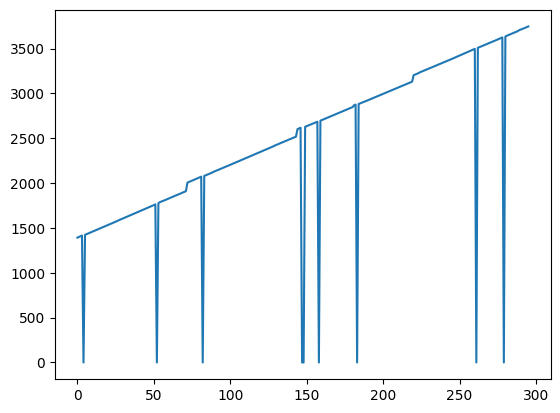

TS_ObjectGrasp is a list of 296 objects


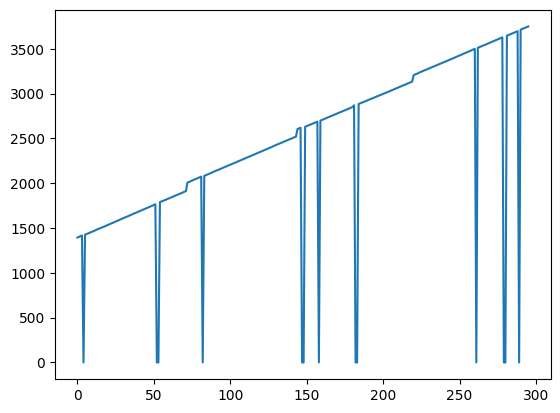

TS_ObjectReplace is a list of 296 objects


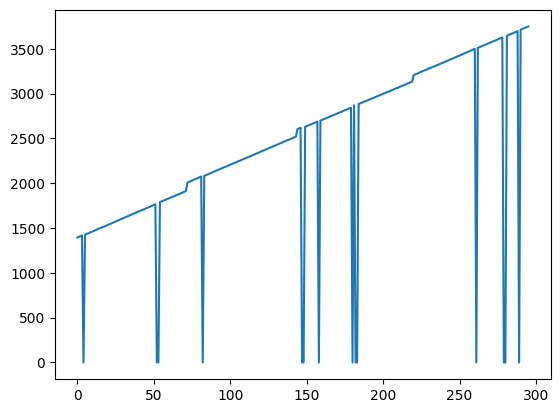

TS_HandBack is a list of 296 objects


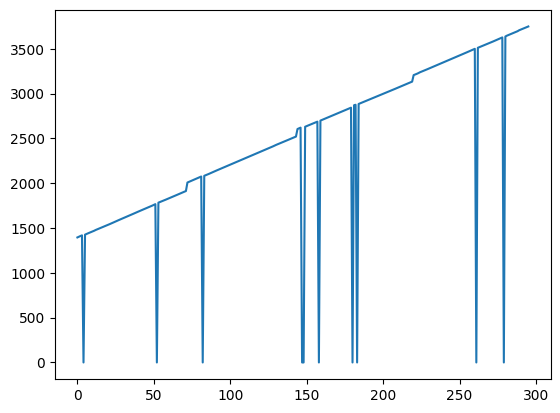

In [270]:
trials_time_variant_keys = ['BlockTimeCode', 'TS_BlockCode', 'TS_TrialStart', 'TS_CueOn', 'TS_CueOff', 'TS_GoSignal', 'TS_HandOut', 'TS_ObjectGrasp', 'TS_ObjectReplace', 'TS_HandBack']
for keys in trials_time_variant_keys:
    array = np.array(data[participant][session]['trials_info'][keys])
    print(f'{keys} is a list of {len(array)} objects')
    plt.plot(array)
    plt.show()

In [213]:
trials_errors_keys = ['ErrorCode', 'ErrorType']
for keys in trials_errors_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

ErrorCode is a list of 296 objects
Unique values of ErrorCode : [ 0  1  2  3  4  5  6 10] (8 unique values)
************************************
ErrorType is a list of 296 objects
Unique values of ErrorType : ['BaselineError' 'ButtonsError' 'CueError' 'Discarded' 'NoError'
 'NoGraspError' 'TimeOutError' 'WaitError'] (8 unique values)
************************************


In [214]:
trials_grasp_keys = ['ObjectGrasped', 'ObjectTargeted', 'CorrectGrasped', 'CatchMistakeDetected']
for keys in trials_grasp_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

ObjectGrasped is a list of 296 objects
Unique values of ObjectGrasped : [0 1 3] (3 unique values)
************************************
ObjectTargeted is a list of 296 objects
Unique values of ObjectTargeted : [1 3] (2 unique values)
************************************
CorrectGrasped is a list of 296 objects
Unique values of CorrectGrasped : [0 1] (2 unique values)
************************************
CatchMistakeDetected is a list of 296 objects
Unique values of CatchMistakeDetected : [-1  0  1] (3 unique values)
************************************


Dur_Baseline is a list of 296 objects


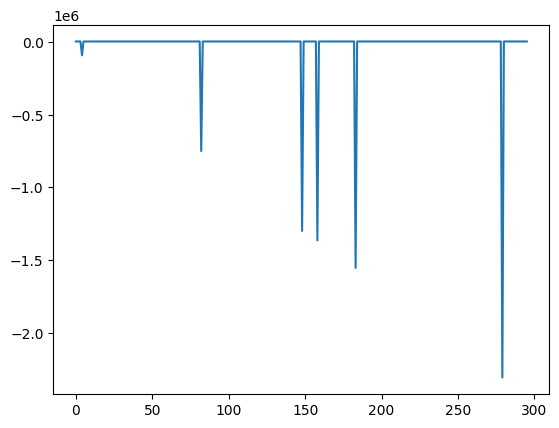

Dur_Cue is a list of 296 objects


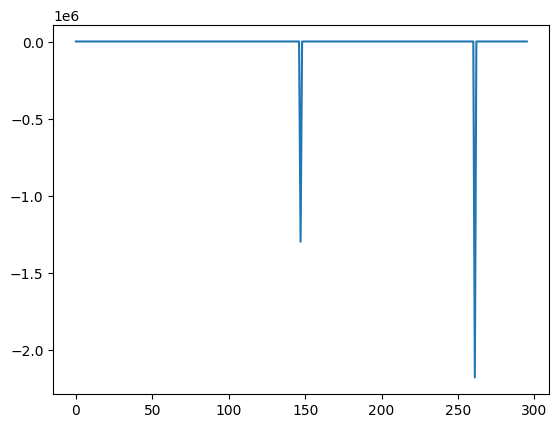

Dur_WaitToGo is a list of 296 objects


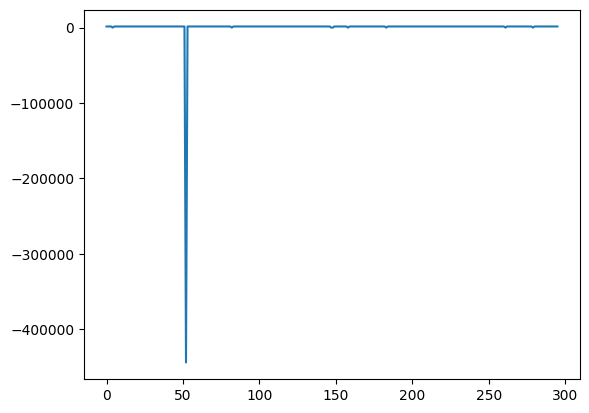

Dur_ReacTime is a list of 296 objects


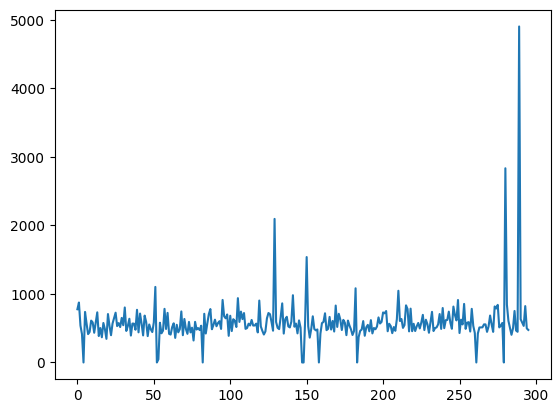

Dur_Reaching is a list of 296 objects


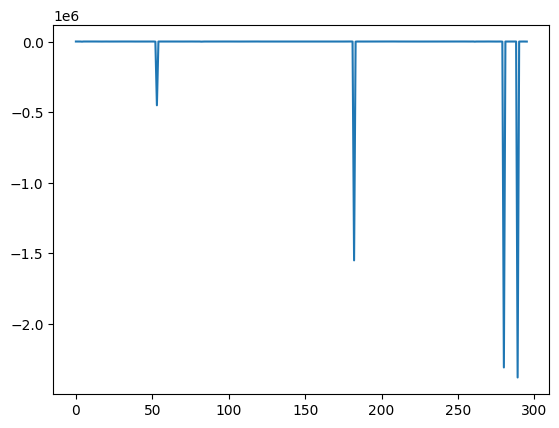

Dur_Grasped is a list of 296 objects


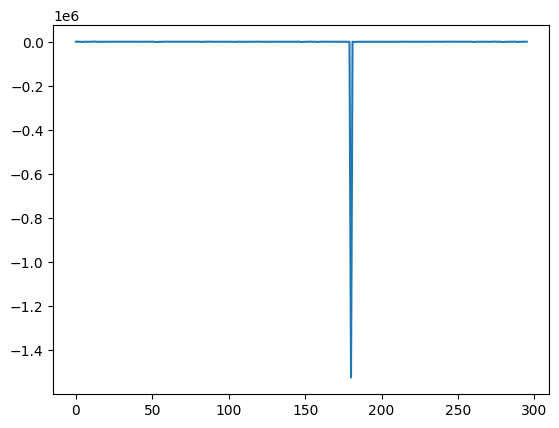

Dur_GoBack is a list of 296 objects


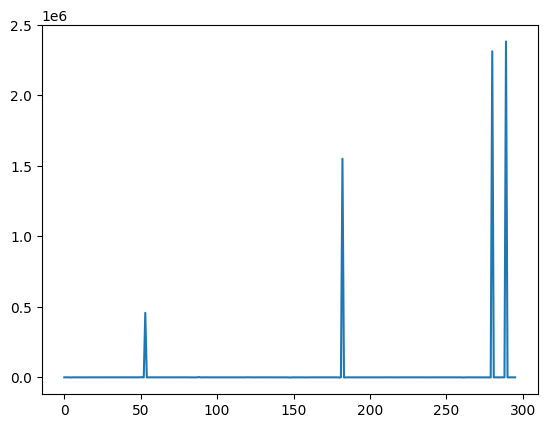

In [ ]:
trials_dur_keys = ['Dur_Baseline', 'Dur_Cue', 'Dur_WaitToGo', 'Dur_ReacTime', 'Dur_Reaching', 'Dur_Grasped', 'Dur_GoBack']
for keys in trials_dur_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    plt.plot(np.array(data[participant][session]['trials_info'][keys]))
    plt.show()

In [266]:
trials_filerelated_keys = ['Outfile', 'Note', 'BlockTimeStamp']
for keys in trials_filerelated_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

Outfile is a list of 296 objects
Unique values of Outfile : ['AP_s06_exe-obs_sess1_2023.05.09_13.52.41_Block02__TaskOK_.mat'
 'AP_s06_exe-obs_sess1_2023.05.09_14.03.16_Block03__TaskOK_.mat'
 'AP_s06_exe-obs_sess1_2023.05.09_14.13.13_Block04__TaskOK_.mat'
 'AP_s06_exe-obs_sess1_2023.05.09_14.23.16_Block05__TaskOK_.mat'] (4 unique values)
************************************
Note is a list of 296 objects
Unique values of Note : ['_TaskOK_'] (1 unique values)
************************************
BlockTimeStamp is a list of 296 objects
Unique values of BlockTimeStamp : ['2023.05.09_13.52.41' '2023.05.09_14.03.16' '2023.05.09_14.13.13'
 '2023.05.09_14.23.16'] (4 unique values)
************************************


TimeRef_Mat is a list of 296 objects
Unique values of TimeRef_Mat : [  36.592  672.615 1269.977 1871.17 ] (4 unique values)
************************************
TimeRef_Pulse is a list of 296 objects
Unique values of TimeRef_Pulse : [1362.00878906 1998.03173828 2595.39599609 3196.58691406] (4 unique values)
************************************


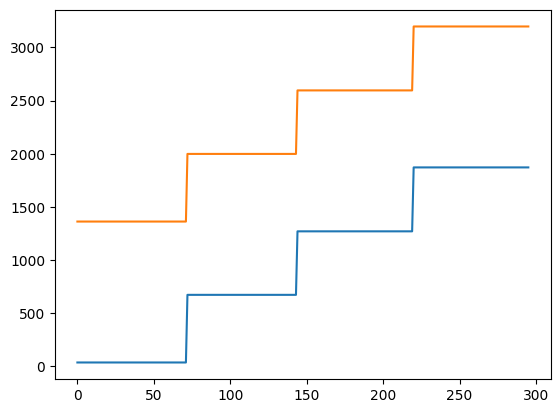

In [268]:
trials_timeRef_keys = ['TimeRef_Mat', 'TimeRef_Pulse']
for keys in trials_timeRef_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    plt.plot(np.array(data[participant][session]['trials_info'][keys]))
    print('************************************')

In [269]:
trials_keys = ['TrialFound', 'BlockID']
for keys in trials_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

TrialFound is a list of 296 objects
Unique values of TrialFound : [1] (1 unique values)
************************************
BlockID is a list of 296 objects
Unique values of BlockID : ['402481' '448257' '471490' '563154'] (4 unique values)
************************************


In [276]:
trials_time_variant_keys = ['BlockTimeCode', 'TS_BlockCode', 'TS_TrialStart', 'TS_CueOn', 'TS_CueOff', 'TS_GoSignal', 'TS_HandOut', 'TS_ObjectGrasp', 'TS_ObjectReplace', 'TS_HandBack']
trials_p_time_variant_keys = ['p_BlockTimeCode', 'p_TS_BlockCode', 'p_TS_TrialStart', 'p_TS_CueOn', 'p_TS_GoSignal', 'p_TS_HandOut', 'p_TS_ObjectGrasp', 'p_TS_ObjectReplace', 'p_TS_HandBack']

for keys in trials_time_variant_keys :
    p_keys = 'p_' + keys
    if keys != 'TS_CueOff':
        print((np.array(data[participant][session]['trials_info'][keys]) == np.array(data[participant][session]['trials_info'][p_keys])).all())


False
True
True
True
True
True
True
True
True


SyncError_Trend is a list of 296 objects


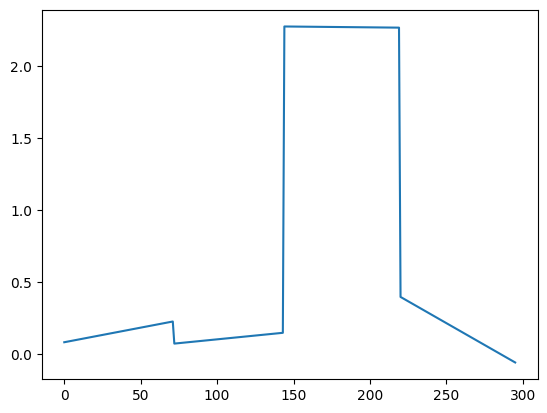

SyncError_ms is a list of 296 objects


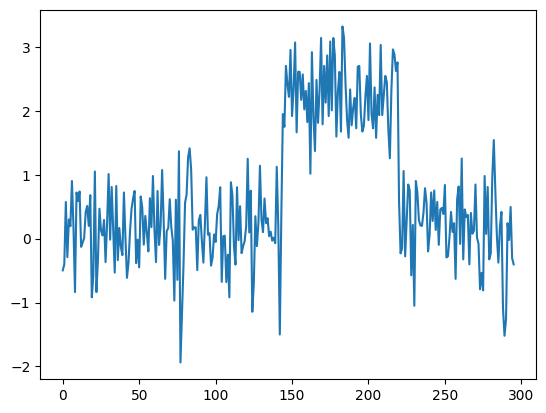

SyncError_Trend_ttest is a list of 296 objects


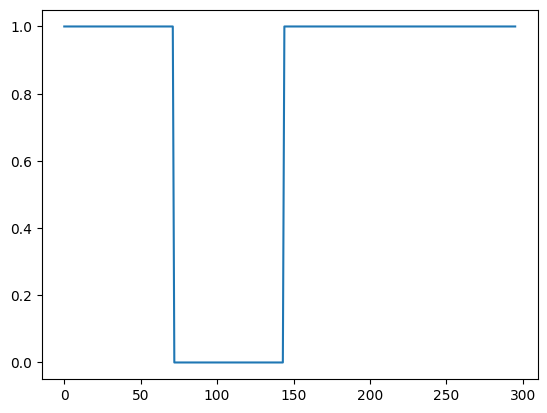

SequenceError_ms is a list of 296 objects


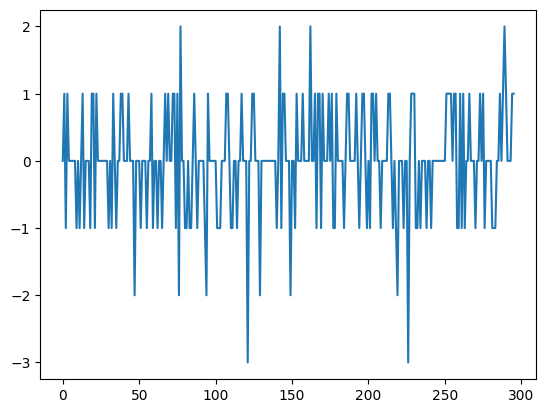

SequenceErrorSum_ms is a list of 296 objects


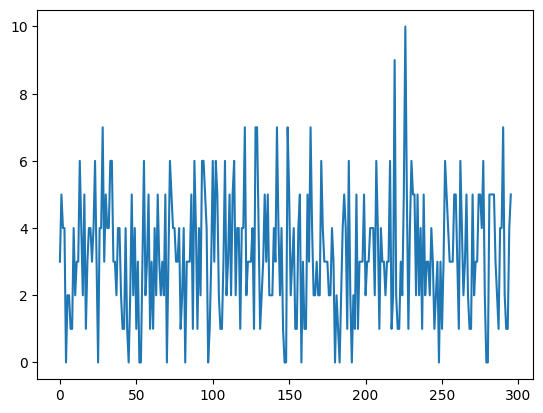

SequenceMatch is a list of 296 objects


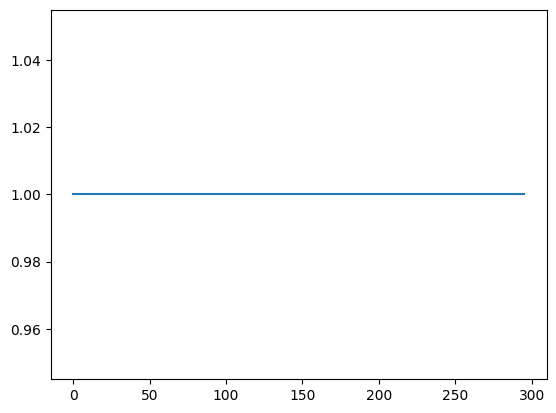

In [285]:
trials_syncError_keys = ['SyncError_Trend', 'SyncError_ms', 'SyncError_Trend_ttest', 'SequenceError_ms', 'SequenceErrorSum_ms', 'SequenceMatch']
for keys in trials_syncError_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    plt.plot(np.array(data[participant][session]['trials_info'][keys]))
    plt.show()

final_diff is a list of 296 objects
Unique values of final_diff : [ 0. nan] (2 unique values)
************************************
final_diff_mean is a list of 296 objects
Unique values of final_diff_mean : [0] (1 unique values)
************************************
align_mode is a list of 296 objects
Unique values of align_mode : ['self_ts'] (1 unique values)
************************************
align_diff_ttest is a list of 296 objects
Unique values of align_diff_ttest : [0] (1 unique values)
************************************
align_diff is a list of 296 objects


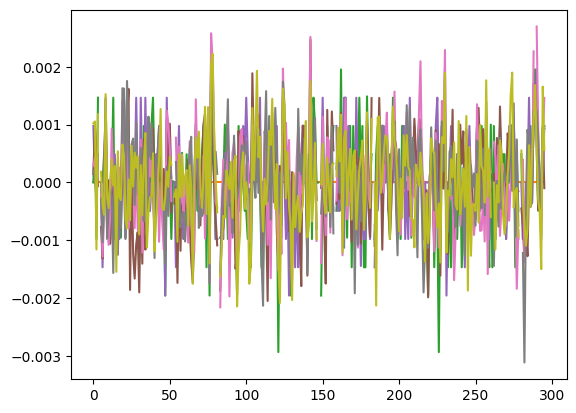

align_diff_mean is a list of 296 objects


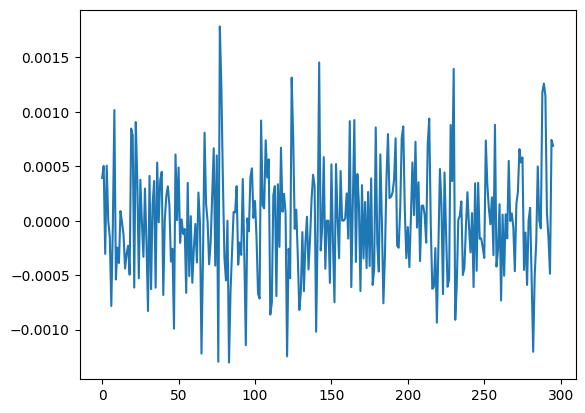

align_diff_trend is a list of 296 objects


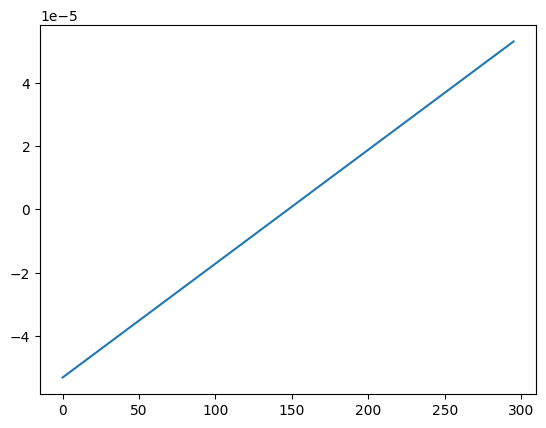

In [288]:
trials_align_num_keys = ['align_diff', 'align_diff_mean', 'align_diff_trend']
trials_align_keys = ['final_diff', 'final_diff_mean', 'align_mode', 'align_diff_ttest']

for keys in trials_align_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    print(f'Unique values of {keys} : {np.unique(data[participant][session]['trials_info'][keys])} ({len(np.unique(data[participant][session]['trials_info'][keys]))} unique values)')
    print('************************************')

for keys in trials_align_num_keys:
    print(f'{keys} is a list of {len(data[participant][session]['trials_info'][keys])} objects')
    plt.plot(np.array(data[participant][session]['trials_info'][keys]))
    plt.show()

## Neural data

In [18]:
Nb_channels = len(data[participant][session]['channel_labels'])
Nb_timepoints = data[participant][session]['neural_data'].shape[1]

Neural data
(106, 7718528)
sEEG data for channel P2a1


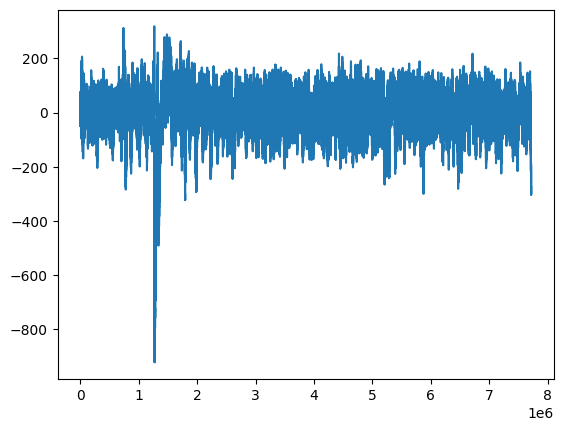

In [290]:
channel_idx = 0
channel = data[participant][session]['channel_labels'][channel_idx]

print('Neural data')
print(data['s6']['sess1']['neural_data'].shape)

print(f'sEEG data for channel {channel}')

sEEG_data = data[participant][session]['neural_data'][channel_idx,:]
plt.plot(sEEG_data)

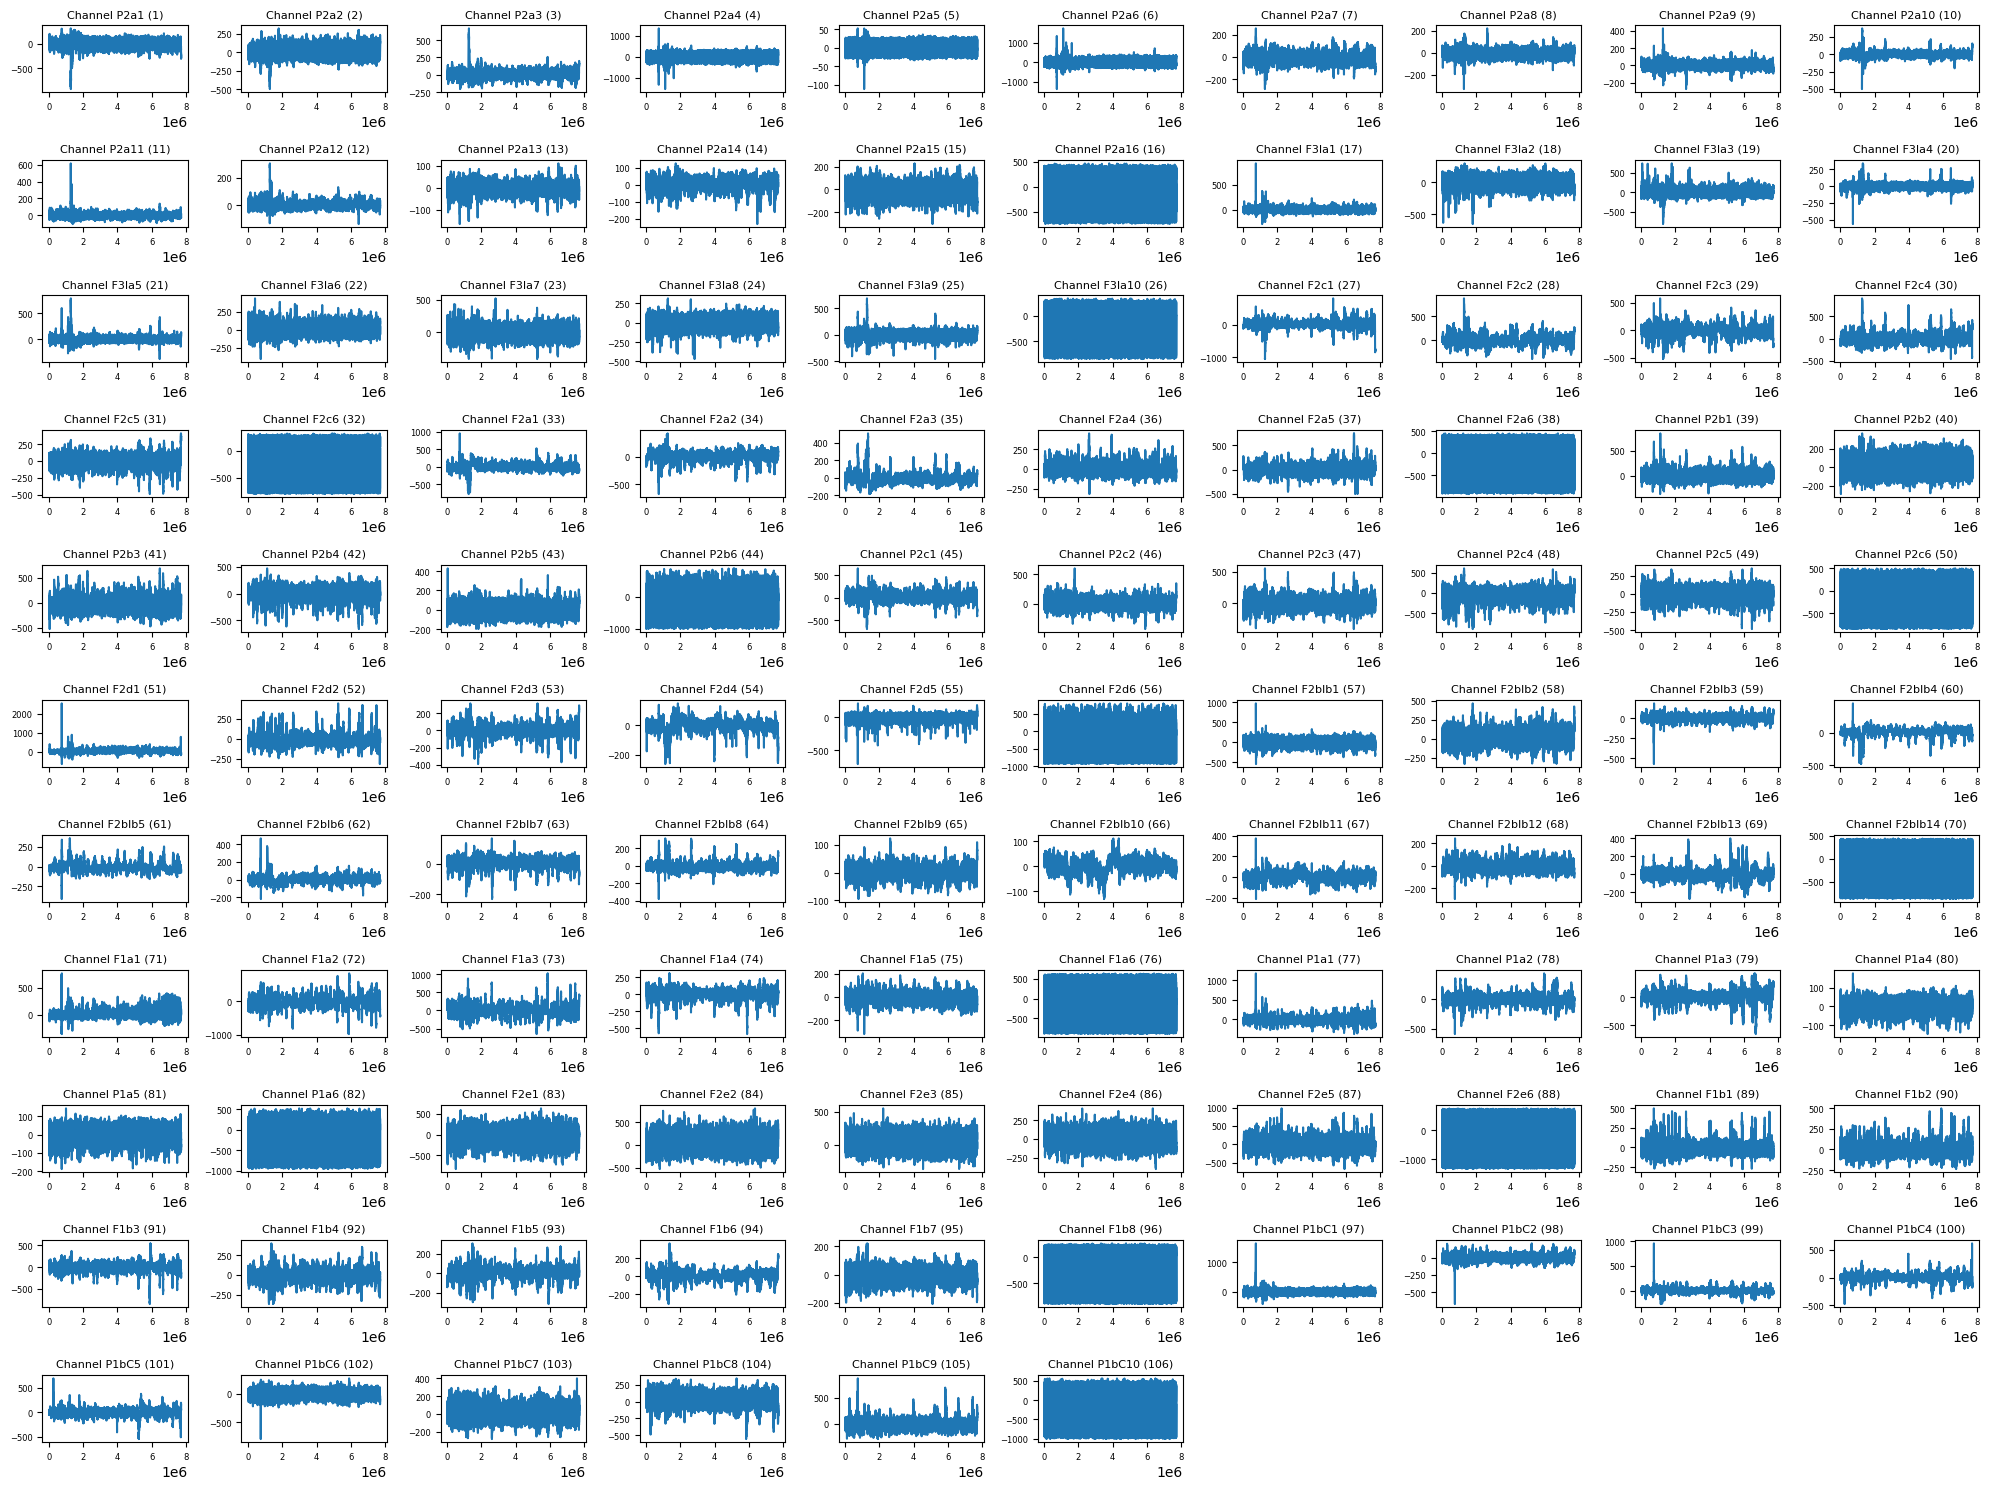

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sarah\\OneDrive\\NXMA1\\ML\\ml-project-2-ml4science_tne\\Code\\image\\sEEG_channels_signal_s6_sess1.png'

In [ ]:
n_rows = 11
n_cols = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to access each subplot by index

for channel_idx in range(Nb_channels):
    channel = data[participant][session]['channel_labels'][channel_idx]
    sEEG_data = data[participant][session]['neural_data'][channel_idx, :]
    
    # Plot on the corresponding subplot
    axes[channel_idx].plot(sEEG_data)
    axes[channel_idx].set_title(f'Channel {channel} ({channel_idx+1})', fontsize=8)
    axes[channel_idx].tick_params(axis='both', which='major', labelsize=6)

# Hide unused subplots if any
for idx in range(Nb_channels, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust layout
plt.show()

fig.savefig(f'images/sEEG_channels_signal_{participant}_{session}.png')


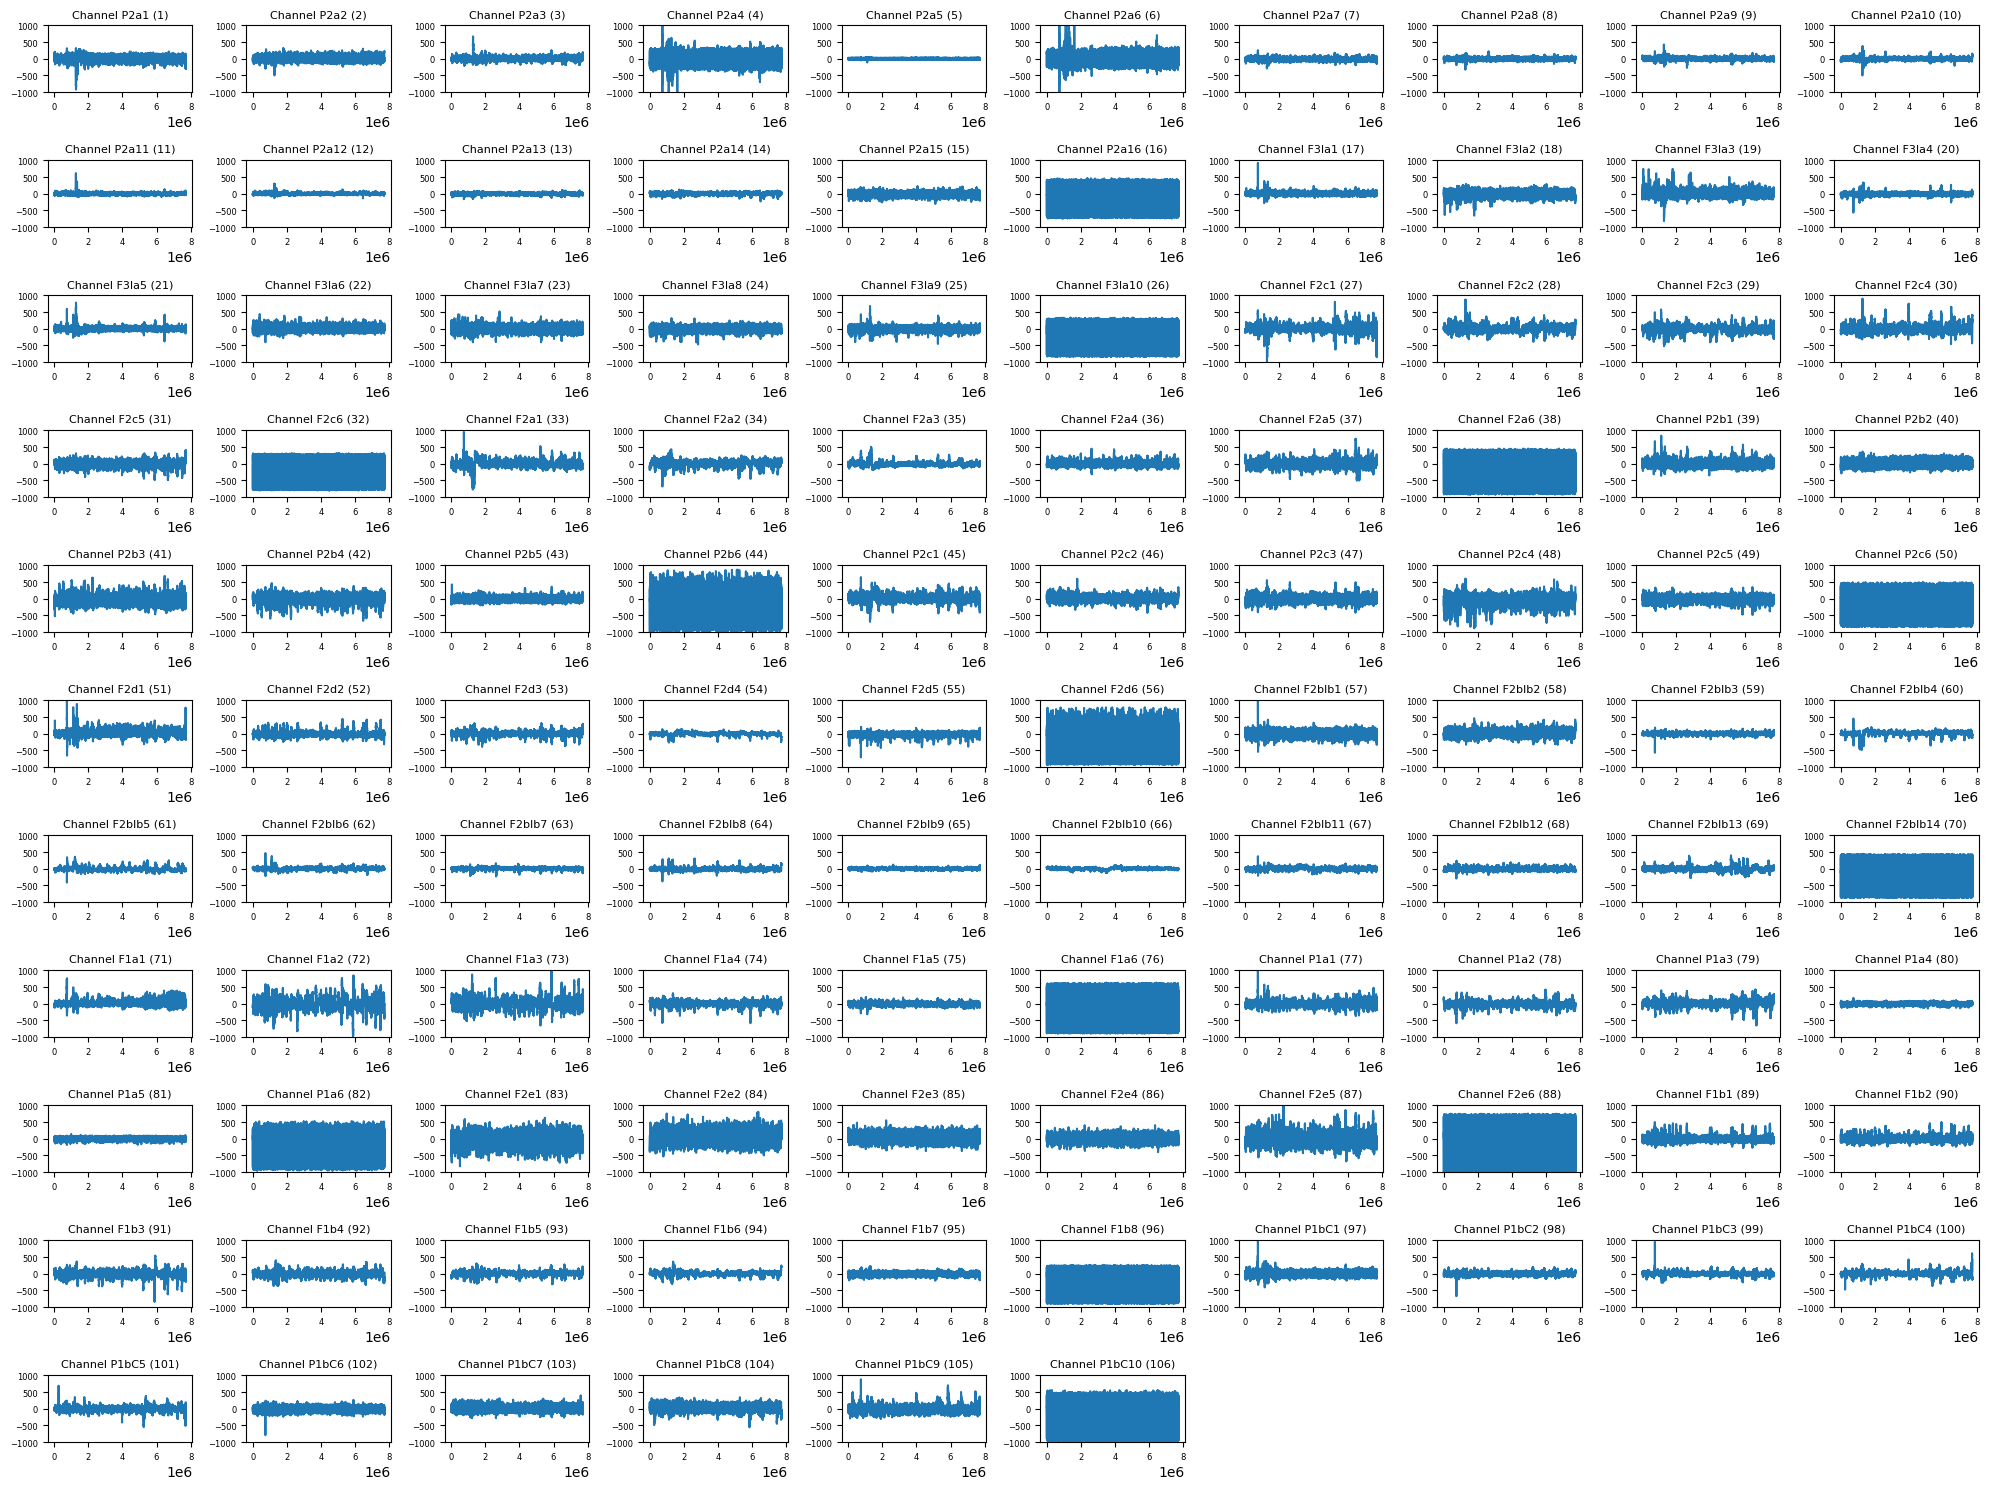

In [6]:
# all same axis
n_rows = 11
n_cols = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to access each subplot by index

for channel_idx in range(Nb_channels):
    channel = data[participant][session]['channel_labels'][channel_idx]
    sEEG_data = data[participant][session]['neural_data'][channel_idx, :]
    
    # Plot on the corresponding subplot
    axes[channel_idx].plot(sEEG_data)
    axes[channel_idx].set_title(f'Channel {channel} ({channel_idx+1})', fontsize=8)
    axes[channel_idx].tick_params(axis='both', which='major', labelsize=6)
    axes[channel_idx].set_ylim(-1000, 1000)

# Hide unused subplots if any
for idx in range(Nb_channels, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust layout
plt.show()

fig.savefig(f'images/sEEG_channels_signal_{participant}_{session}_restricted.png')


C:\Users\sarah\AppData\Local\Temp\ipykernel_2580\3793050630.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout


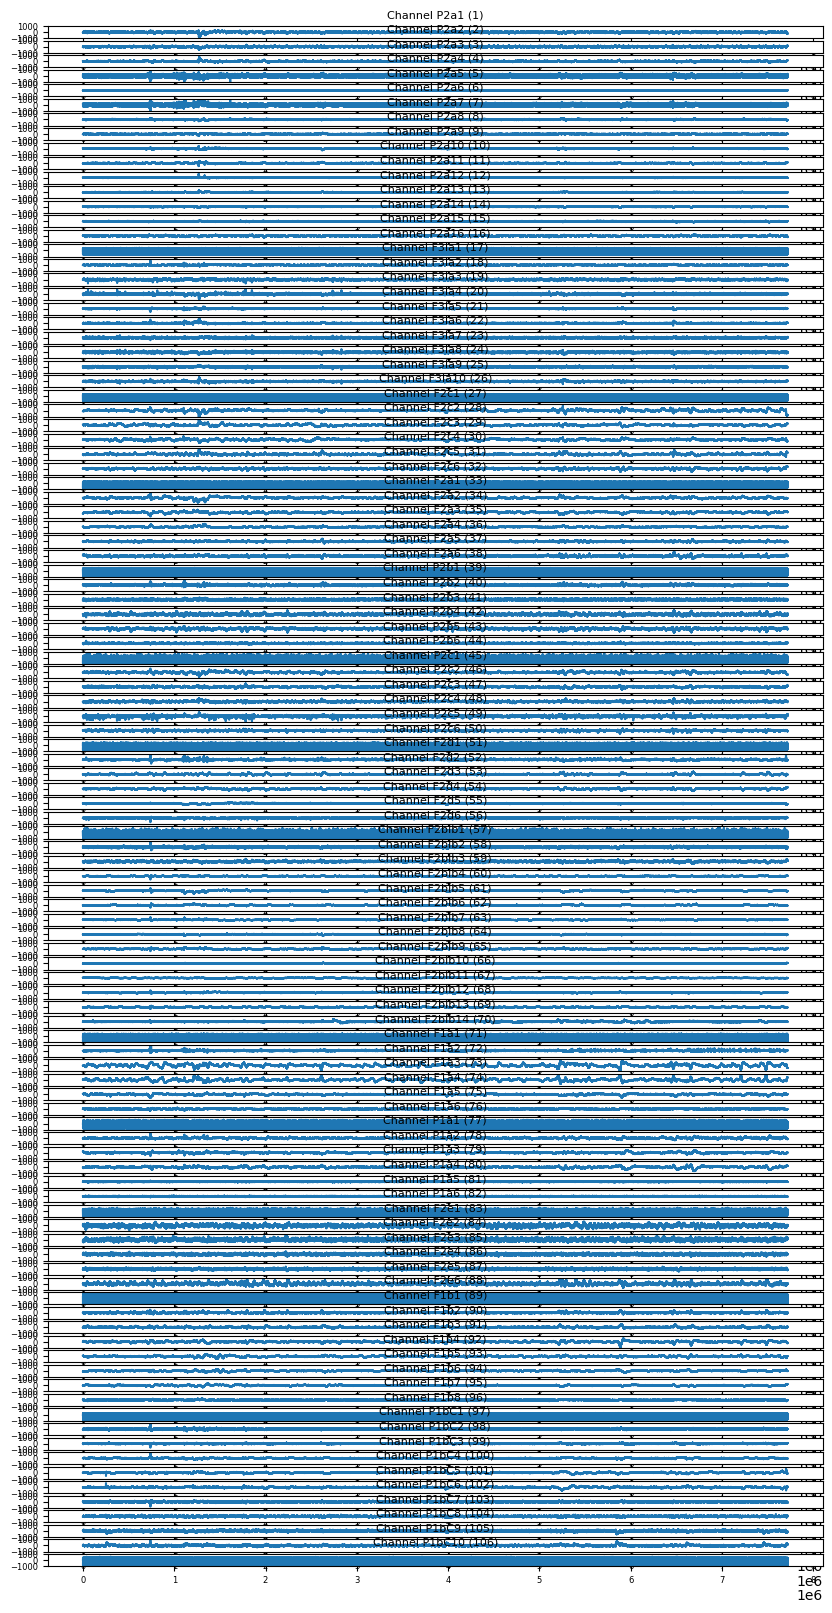

In [19]:
# all same axis
n_rows = Nb_channels
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 20))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to access each subplot by index

for channel_idx in range(Nb_channels):
    channel = data[participant][session]['channel_labels'][channel_idx]
    sEEG_data = data[participant][session]['neural_data'][channel_idx, :]
    
    # Plot on the corresponding subplot
    axes[channel_idx].plot(sEEG_data)
    axes[channel_idx].set_title(f'Channel {channel} ({channel_idx+1})', fontsize=8)
    axes[channel_idx].tick_params(axis='both', which='major', labelsize=6)
    axes[channel_idx].set_ylim(-1000, 1000)

# Hide unused subplots if any
for idx in range(Nb_channels, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust layout
plt.show()

fig.savefig(f'images/sEEG_channels_signal_{participant}_{session}_packed.png')



## Channel location

In [9]:
for i in data[participant][session]['channel_locations']:
    print(i)
    print(i.shape)

['paracentral' 'paracentral' 'paracentral' 'paracentral' 'paracentral'
 'WM_paracentral' 'WM_precentral' 'WM_precentral' 'WM_precentral'
 'postcentral' 'postcentral' 'postcentral' 'postcentral' 'postcentral'
 'postcentral' 'postcentral' 'WM_insula' 'insula' 'insula' 'insula'
 'WM_precentral' 'precentral' 'precentral' 'precentral' 'precentral'
 'precentral' 'precentral' 'precentral' 'precentral' 'precentral'
 'precentral' 'precentral' 'caudalmiddlefrontal' 'caudalmiddlefrontal'
 'precentral' 'precentral' 'precentral' 'precentral' 'supramarginal'
 'supramarginal' 'supramarginal' 'supramarginal' 'supramarginal'
 'supramarginal' 'postcentral' 'postcentral' 'postcentral' 'postcentral'
 'postcentral' 'postcentral' 'precentral' 'postcentral' 'postcentral'
 'postcentral' 'postcentral' 'postcentral' 'insula' 'insula' 'insula'
 'insula' 'WM_insula' 'WM_precentral' 'WM_precentral' 'WM_precentral'
 'caudalmiddlefrontal' 'caudalmiddlefrontal' 'caudalmiddlefrontal'
 'caudalmiddlefrontal' 'caudalmidd

What is the table with only zeros and one 1 ???

In [12]:
print(f'for participant {participant} and session {session}')
tmp_ch_locs = data[participant][session]['channel_locations'][0]
unique_locs, counts_locs = np.unique(tmp_ch_locs, return_counts = True)
print(f'There are {len(unique_locs)} unique brain locations.')
print('These are:')
for l, loc in enumerate(unique_locs):
    print(f'- {loc} : {counts_locs[l]} channels')

for participant s6 and session sess1
There are 10 unique brain locations.
These are:
- WM_insula : 2 channels
- WM_paracentral : 2 channels
- WM_precentral : 7 channels
- caudalmiddlefrontal : 8 channels
- insula : 7 channels
- paracentral : 9 channels
- postcentral : 21 channels
- precentral : 36 channels
- superiorfrontal : 8 channels
- supramarginal : 6 channels


## Channels across participants

In [13]:
for participant in data.keys():
    for session in data[participant].keys():
        print('************************************')
        tmp_ch_locs = data[participant][session]['channel_locations'][0]
        unique_locs, counts_locs = np.unique(tmp_ch_locs, return_counts = True)
        print(f'There are {len(tmp_ch_locs)} brain locations in total.')
        print(f'There are {len(unique_locs)} unique brain locations.')

************************************
There are 106 brain locations in total.
There are 10 unique brain locations.
************************************
There are 102 brain locations in total.
There are 11 unique brain locations.
************************************
There are 133 brain locations in total.
There are 15 unique brain locations.
************************************
There are 133 brain locations in total.
There are 15 unique brain locations.
************************************
There are 133 brain locations in total.
There are 15 unique brain locations.
************************************
There are 186 brain locations in total.
There are 19 unique brain locations.
************************************
There are 186 brain locations in total.
There are 19 unique brain locations.


In [12]:
channel_labels = []

for participant in data.keys():
    for session in data[participant].keys():
        tmp_ch_locs = data[participant][session]['channel_locations'][0]
        unique_locs, counts_locs = np.unique(tmp_ch_locs, return_counts = True)
        
        for l, loc in enumerate(unique_locs):
            count = channel_labels.count(loc)
            if counts_locs[l] != count:
                add = counts_locs[l] - count
                for i in range(add):
                    channel_labels.append(loc)             
        
print(f'There are {len(channel_labels)} brain locations in total.')

unique_locs, counts_locs = np.unique(np.array(channel_labels), return_counts = True)
print(f'There are {len(unique_locs)} unique brain locations.')
print('These are:')
for l, loc in enumerate(unique_locs):
    print(f'- {loc} : {counts_locs[l]} channels')

There are 308 brain locations in total.
There are 28 unique brain locations.
These are:
- Putamen : 3 channels
- Thalamus : 1 channels
- WM_insula : 2 channels
- WM_paracentral : 2 channels
- WM_precentral : 7 channels
- WM_rostralmiddlefrontal : 1 channels
- WM_superiorfrontal : 1 channels
- caudalanteriorcingulate : 8 channels
- caudalmiddlefrontal : 11 channels
- inferiorparietal : 8 channels
- insula : 25 channels
- isthmuscingulate : 6 channels
- medialorbitofrontal : 8 channels
- paracentral : 12 channels
- parsopercularis : 6 channels
- parstriangularis : 4 channels
- postcentral : 21 channels
- posteriorcingulate : 15 channels
- precentral : 36 channels
- precuneus : 17 channels
- rostralanteriorcingulate : 5 channels
- rostralmiddlefrontal : 12 channels
- superiorfrontal : 53 channels
- superiorparietal : 19 channels
- superiortemporal : 1 channels
- supramarginal : 20 channels
- transversetemporal : 3 channels
- unknown : 1 channels
